Layer1 => layer2

In [2]:
import tensorflow as tf
from tensorflow import keras

mnist = tf.keras.datasets.mnist

(x_mnist_train, y_mnist_train), (x_mnist_test, y_mnist_test) = mnist.load_data()

2023-05-10 10:28:20.924333: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 10:28:22.067276: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
print(x_mnist_train.shape)

(60000, 28, 28)


In [4]:
print(x_mnist_test.shape)

(10000, 28, 28)


In [5]:
set(y_mnist_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [6]:
def normalize_grayscale(image_data):
 a = 0.1
 b = 0.9
 image_data_min = image_data.min()
 image_data_max = image_data.max()
 return a + (b-a)/(image_data_max-image_data_min)*(image_data-image_data_min)

train_mnist_features = normalize_grayscale(x_mnist_train)
test_mnist_features = normalize_grayscale(x_mnist_test)

In [9]:
inputs = tf.keras.Input(shape= (28, 28))

#28 *28 = 784 pixel 
flatten_layer = keras.layers.Flatten()

flaten_output= flatten_layer(inputs)
dense_layer = tf.keras.layers.Dense(50,activation='relu')

dens_output = dense_layer(flaten_output)

preditions = tf.keras.layers.Dense(10,activation='softmax')(dens_output)

model = keras.Model(inputs = inputs,outputs = preditions)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                39250     
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


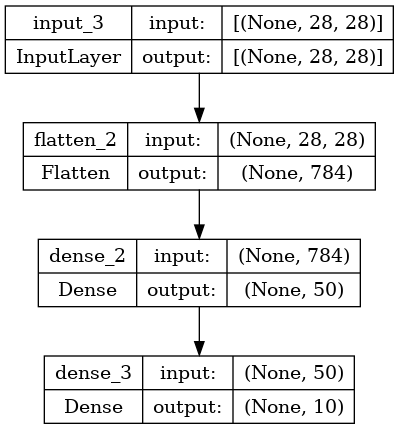

In [10]:
keras.utils.plot_model(model, to_file='image_classification_model.png', show_shapes=True)

In [14]:
#Complite
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#train
model.fit(train_mnist_features,y_mnist_train,validation_data=(test_mnist_features,y_mnist_test),
          epochs=10)

Epoch 1/10


2023-05-10 10:59:49.203494: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-05-10 10:59:49.241595: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f67562b8690 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-10 10:59:49.241655: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-05-10 10:59:49.576601: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


  16/1875 [..............................] - ETA: 6s - loss: 2.2408 - accuracy: 0.2031     

2023-05-10 10:59:49.903404: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 9s 3ms/step - loss: 0.7525 - accuracy: 0.8154 - val_loss: 0.4055 - val_accuracy: 0.8904
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3829 - accuracy: 0.8941 - val_loss: 0.3371 - val_accuracy: 0.9059
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3359 - accuracy: 0.9050 - val_loss: 0.3123 - val_accuracy: 0.9108
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3116 - accuracy: 0.9114 - val_loss: 0.2941 - val_accuracy: 0.9167
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2950 - accuracy: 0.9153 - val_loss: 0.2819 - val_accuracy: 0.9210
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2814 - accuracy: 0.9198 - val_loss: 0.2730 - val_accuracy: 0.9228
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2693 - accuracy: 0.9232 - val_loss: 0.2600 - val_accuracy: 0.9272
Epo

In [15]:
#Timedistributed

from keras.layers import TimeDistributed

input_sequences = tf.keras.Input(shape=(10,28,28))

processed_sequences = tf.keras.layers.TimeDistributed(
 model
)(input_sequences)

In [16]:
processed_sequences

<KerasTensor: shape=(None, 10, 10) dtype=float32 (created by layer 'time_distributed')>

In [25]:
house_data_input = tf.keras.Input(shape=(128,),name = 'house_data')
x = tf.keras.layers.Dense(64, activation='relu')(house_data_input)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
block1_output = tf.keras.layers.Dense(32, activation='relu')(x)

house_picture_input = tf.keras.Input(shape=(320,320,3),name = 'house_picture')
y = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(house_picture_input)
y = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(y)
block2_output = tf.keras.layers.Flatten()(y)


input_feature = tf.keras.layers.concatenate([block1_output, block2_output])

predic_price = tf.keras.layers.Dense(1,activation='relu',name='price')(input_feature)
time_sale = tf.keras.layers.Dense(2,activation='softmax',name='time_sale')(input_feature)

model =keras.Model(inputs=[house_data_input,house_picture_input],outputs=[predic_price,time_sale])

In [26]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 house_data (InputLayer)        [(None, 128)]        0           []                               
                                                                                                  
 house_picture (InputLayer)     [(None, 320, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 dense_19 (Dense)               (None, 64)           8256        ['house_data[0][0]']             
                                                                                                  
 conv2d_10 (Conv2D)             (None, 320, 320, 64  1792        ['house_picture[0][0]']    

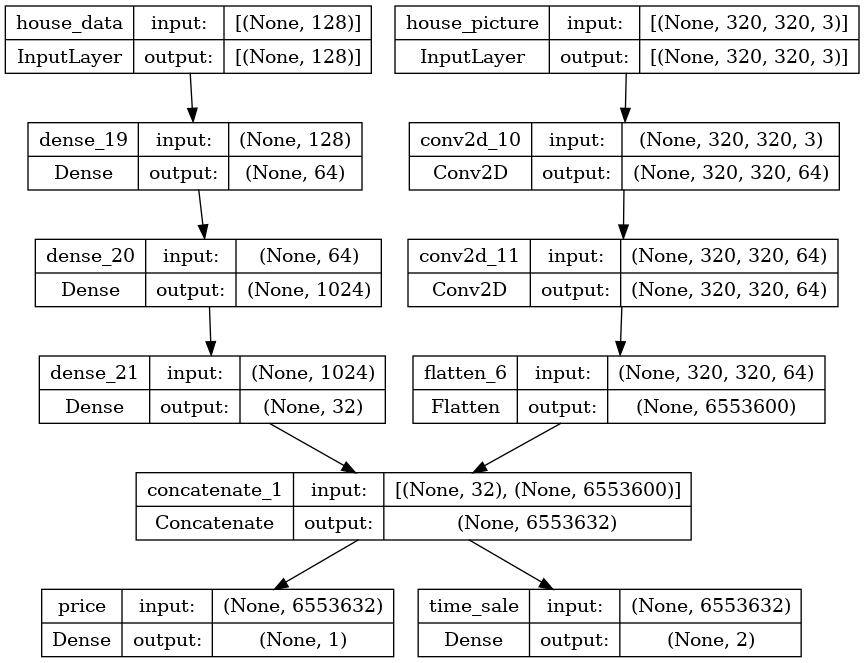

In [27]:
keras.utils.plot_model(model, to_file='house_model.png', show_shapes=True)

In [33]:
#Dung chung layer

text_input_a = tf.keras.Input(shape=(28,28,1), dtype='int32')
text_input_b = tf.keras.Input(shape=(28,28,1), dtype='int32')

shared_embedding_layer = tf.keras.layers.Embedding(1000,128)

encoded_input_a = shared_embedding_layer(text_input_a)
encoded_input_b = shared_embedding_layer(text_input_b)

In [34]:
resnet = tf.keras.applications.resnet.ResNet50(
 
)

102967424/102967424 [==============================] - 11s 0us/step


In [35]:
resnet.inputs

[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_15')>]

In [36]:
resnet.output

<KerasTensor: shape=(None, 1000) dtype=float32 (created by layer 'predictions')>

In [39]:
inforlayeroutput =  [layer.output for layer in resnet.layers]
inforlayeroutput[0:10]

[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_15')>,
 <KerasTensor: shape=(None, 230, 230, 3) dtype=float32 (created by layer 'conv1_pad')>,
 <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'conv1_conv')>,
 <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'conv1_bn')>,
 <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'conv1_relu')>,
 <KerasTensor: shape=(None, 114, 114, 64) dtype=float32 (created by layer 'pool1_pad')>,
 <KerasTensor: shape=(None, 56, 56, 64) dtype=float32 (created by layer 'pool1_pool')>,
 <KerasTensor: shape=(None, 56, 56, 64) dtype=float32 (created by layer 'conv2_block1_1_conv')>,
 <KerasTensor: shape=(None, 56, 56, 64) dtype=float32 (created by layer 'conv2_block1_1_bn')>,
 <KerasTensor: shape=(None, 56, 56, 64) dtype=float32 (created by layer 'conv2_block1_1_relu')>]

: 